# Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from statsmodels.tsa.vector_ar.vecm import VECM

# Reading CSV Files

In [2]:
a=pd.read_csv('A.csv')
b=pd.read_csv('B.csv')
c=pd.read_csv('C.csv')
x=pd.read_csv('X.csv')
y=pd.read_csv('Y.csv')
z=pd.read_csv('Z.csv')

# Question 1

## Data Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000171B73706A0>],
      dtype=object)

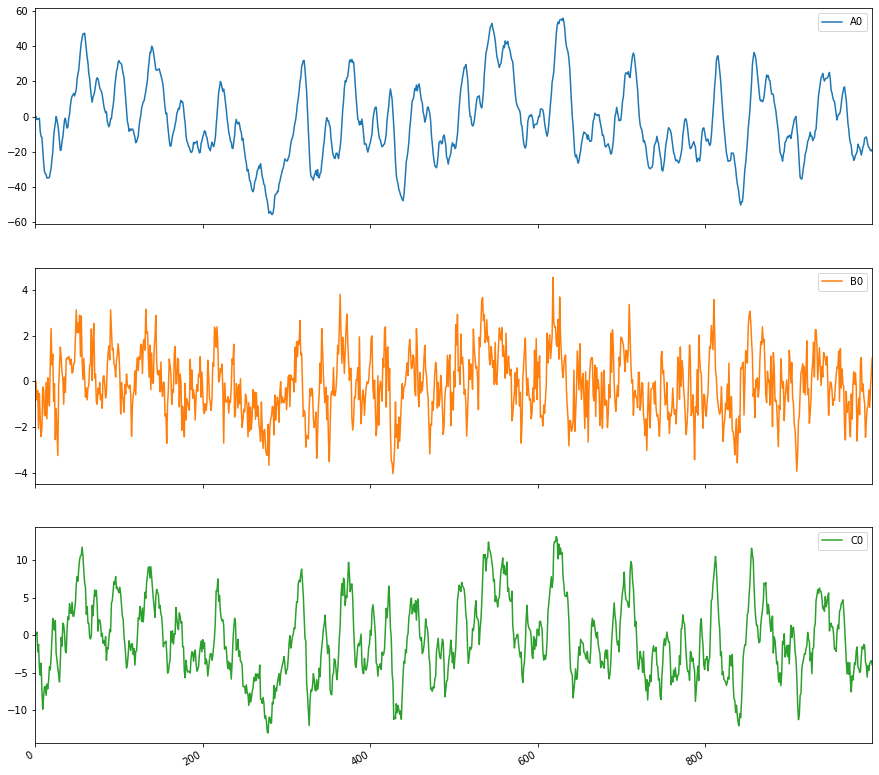

In [3]:
a0=a["0"]
b0=b["0"]
c0=c["0"]
dfr=pd.DataFrame({"A0":a0,"B0":b0,"C0":c0})
dfr.plot(subplots=True,layout=(3,1),figsize=(15,15))

## DataFrame the Series

In [4]:
dfr.head(10)

,A0,B0,C0
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,-1.690123,-0.809757,0.420383
3,-1.219096,-0.412396,-2.200924
4,-1.410304,-2.072510,-1.201323
5,-1.014350,-0.537330,-4.511621
6,-8.513030,-1.652311,-5.304709
7,-11.253895,-2.414523,-3.703352
8,-11.939093,-2.061066,-7.275618
9,-19.036759,-0.246373,-9.841475


## VAR Model

In [5]:
model=VAR(dfr)
model

## Lag Order Selection

In [6]:
lag_order=model.select_order(15)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        8.543       8.558       5131.       8.549
1       0.2952      0.3548       1.343      0.3179
2     0.02932*     0.1336*      1.030*    0.06900*
3      0.03951      0.1885       1.040     0.09619
4      0.04831      0.2420       1.049      0.1220
5      0.05904      0.2975       1.061      0.1497
6      0.07068      0.3538       1.073      0.1784
7      0.08682      0.4147       1.091      0.2115
8      0.09559      0.4681       1.100      0.2373
9      0.09996      0.5172       1.105      0.2587
10      0.1029      0.5649       1.108      0.2786
11      0.1147      0.6213       1.122      0.3074
12      0.1244      0.6758       1.133      0.3342
13      0.1273      0.7234       1.136      0.3540
14      0.1357      0.7765       1.146      0.3794
15      0.1421      0.8276       1.153      0.4028
-------------------------------

## Model Fit at Different Lag Order

In [7]:
result1=model.fit(1)
print(result1.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, Mar, 2020
Time:                     21:42:39
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.364364
Nobs:                     999.000    HQIC:                  0.327826
Log likelihood:          -4393.12    FPE:                    1.35720
AIC:                     0.305424    Det(Omega_mle):         1.34103
--------------------------------------------------------------------
Results for equation A0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.012442         0.034716           -0.358           0.720
L1.A0         0.771774         0.002776          277.976           0.000
L1.B0         0.002064         0.031548            0.065           0.948
L1.C0         1.157302

In [8]:
result2=model.fit(2)
print(result2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, Mar, 2020
Time:                     21:42:40
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.150727
Nobs:                     998.000    HQIC:                 0.0867368
Log likelihood:          -4251.00    FPE:                    1.04865
AIC:                    0.0474994    Det(Omega_mle):         1.02689
--------------------------------------------------------------------
Results for equation A0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.021805         0.032702           -0.667           0.505
L1.A0         0.506941         0.029924           16.941           0.000
L1.B0         0.019381         0.032257            0.601           0.548
L1.C0         1.036461

In [9]:
result3=model.fit(3)
print(result3.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, Mar, 2020
Time:                     21:42:40
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.203649
Nobs:                     997.000    HQIC:                  0.112165
Log likelihood:          -4241.99    FPE:                    1.05767
AIC:                    0.0560641    Det(Omega_mle):         1.02647
--------------------------------------------------------------------
Results for equation A0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.018673         0.032787           -0.570           0.569
L1.A0         0.498581         0.031825           15.666           0.000
L1.B0         0.017670         0.032617            0.542           0.588
L1.C0         1.024988

## Model Fit at Optimum Lag Order & Result

In [10]:
results=model.fit(2)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, Mar, 2020
Time:                     21:42:40
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.150727
Nobs:                     998.000    HQIC:                 0.0867368
Log likelihood:          -4251.00    FPE:                    1.04865
AIC:                    0.0474994    Det(Omega_mle):         1.02689
--------------------------------------------------------------------
Results for equation A0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.021805         0.032702           -0.667           0.505
L1.A0         0.506941         0.029924           16.941           0.000
L1.B0         0.019381         0.032257            0.601           0.548
L1.C0         1.036461

## Finding Number of Roots

In [11]:
K=3 # Variables
p=2 # Lag Order

nroots=K*p
print("Roots : ")
for i in range(0,nroots):
    print(VARResults.roots(results)[i])
print("Moduli : ")
for i in range(0,nroots):
    print(np.absolute(VARResults.roots(results)[i]))

Roots : 
(-5.038356099006563-0j)
(-2.759797539891225+0.9514553898601893j)
(-2.759797539891225-0.9514553898601893j)
(1.2951020335981087+0.24455937627668625j)
(1.2951020335981087-0.24455937627668625j)
(1.1440891999704337-0j)
Moduli : 
5.038356099006563
2.9192036277182964
2.9192036277182964
1.3179903512373672
1.3179903512373672
1.1440891999704337


<b>All the Moduli Values are greater than 1, so the Model is Stationary.</b>

## Granger Causality (Different Series Combinations)

In [12]:
dfab=pd.DataFrame({"A0":a0,"B0":b0})
dfac=pd.DataFrame({"A0":a0,"C0":c0})

dfba=pd.DataFrame({"B0":b0,"A0":a0})
dfbc=pd.DataFrame({"B0":b0,"C0":c0})

dfca=pd.DataFrame({"C0":c0,"A0":a0})
dfcb=pd.DataFrame({"C0":c0,"B0":b0})

In [13]:
grangercausalitytests(dfab,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=392.7695, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=393.9525, p=0.0000  , df=1
likelihood ratio test: chi2=332.0937, p=0.0000  , df=1
parameter F test:         F=392.7695, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=322.8985, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=649.0487, p=0.0000  , df=2
likelihood ratio test: chi2=499.9850, p=0.0000  , df=2
parameter F test:         F=322.8985, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=362.6217, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1095.5571, p=0.0000  , df=3
likelihood ratio test: chi2=739.1671, p=0.0000  , df=3
parameter F test:         F=362.6217, p=0.0000  , df_denom=990, df_num=3


{1: ({'ssr_ftest': (392.76945207218654, 6.0142896769332006e-74, 996.0, 1),
   'ssr_chi2test': (393.95249259047625, 1.1413683085279492e-87, 1),
   'lrtest': (332.0936640736454, 3.363479848093831e-74, 1),
   'params_ftest': (392.7694520721865, 6.0142896769332006e-74, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (322.89846460152796, 9.409555871100861e-109, 993.0, 2),
   'ssr_chi2test': (649.0486760771902, 1.150457942023169e-141, 2),
   'lrtest': (499.9850338019123, 2.689238950068855e-109, 2),
   'params_ftest': (322.89846460152756, 9.409555871103e-109, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (362.62170661965246, 7.564754388360949e-159, 990.0, 3),
   'ssr_chi2test': (1095.5570954539196, 3.349290823893576e-237, 3),
   'lrtest': (739.1671438367075, 6.742048313468656e-160, 3),
   'params_ftest': (362.62170661965246, 7.564754388360949e-159, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0

In [14]:
grangercausalitytests(dfac,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10057.5224, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=10087.8161, p=0.0000  , df=1
likelihood ratio test: chi2=2404.3504, p=0.0000  , df=1
parameter F test:         F=10057.5224, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2195.0923, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=4412.2903, p=0.0000  , df=2
likelihood ratio test: chi2=1686.9242, p=0.0000  , df=2
parameter F test:         F=2195.0923, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1409.5274, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=4258.4812, p=0.0000  , df=3
likelihood ratio test: chi2=1657.2892, p=0.0000  , df=3
parameter F test:         F=1409.5274, p=0.0000  , df_denom=990, df_num=3


{1: ({'ssr_ftest': (10057.522401555507, 0.0, 996.0, 1),
   'ssr_chi2test': (10087.816143728865, 0.0, 1),
   'lrtest': (2404.3504107687413, 0.0, 1),
   'params_ftest': (10057.522401555503, 0.0, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2195.092334847331, 0.0, 993.0, 2),
   'ssr_chi2test': (4412.290332684062, 0.0, 2),
   'lrtest': (1686.9241504995698, 0.0, 2),
   'params_ftest': (2195.0923348473343, 0.0, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1409.52737516028, 0.0, 990.0, 3),
   'ssr_chi2test': (4258.481191014543, 0.0, 3),
   'lrtest': (1657.2892491484672, 0.0, 3),
   'params_ftest': (1409.527375160281, 0.0, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [15]:
grangercausalitytests(dfba,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0198  , p=0.0826  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=3.0289  , p=0.0818  , df=1
likelihood ratio test: chi2=3.0243  , p=0.0820  , df=1
parameter F test:         F=3.0198  , p=0.0826  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1399  , p=0.8694  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=0.2813  , p=0.8688  , df=2
likelihood ratio test: chi2=0.2812  , p=0.8688  , df=2
parameter F test:         F=0.1399  , p=0.8694  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4656  , p=0.2224  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=4.4277  , p=0.2188  , df=3
likelihood ratio test: chi2=4.4179  , p=0.2197  , df=3
parameter F test:         F=1.4656  , p=0.2224  , df_denom=990, df_num=3


{1: ({'ssr_ftest': (3.0198106082919587, 0.08256215465647816, 996.0, 1),
   'ssr_chi2test': (3.0289064233771756, 0.0817931277158338, 1),
   'lrtest': (3.0243239547589837, 0.08202449929611362, 1),
   'params_ftest': (3.019810608291922, 0.08256215465648095, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.13993308301698912, 0.8694335534094494, 993.0, 2),
   'ssr_chi2test': (0.28127536123052393, 0.8688040392232325, 2),
   'lrtest': (0.28123573148741343, 0.8688212546342364, 2),
   'params_ftest': (0.13993308301706794, 0.8694335534094016, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.4655529457939114, 0.22239460858463453, 990.0, 3),
   'ssr_chi2test': (4.427746324110696, 0.218826407775111, 3),
   'lrtest': (4.417943372472109, 0.21972737592450597, 3),
   'params_ftest': (1.4655529457939542, 0.22239460858460164, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.

In [16]:
grangercausalitytests(dfbc,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.3795 , p=0.0001  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=16.4288 , p=0.0001  , df=1
likelihood ratio test: chi2=16.2952 , p=0.0001  , df=1
parameter F test:         F=16.3795 , p=0.0001  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1996  , p=0.3018  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=2.4112  , p=0.2995  , df=2
likelihood ratio test: chi2=2.4083  , p=0.2999  , df=2
parameter F test:         F=1.1996  , p=0.3018  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0361  , p=0.3757  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=3.1304  , p=0.3720  , df=3
likelihood ratio test: chi2=3.1255  , p=0.3727  , df=3
parameter F test:         F=1.0361  , p=0.3757  , df_denom=990, df_num=3


{1: ({'ssr_ftest': (16.379480774348448, 5.585892324377785e-05, 996.0, 1),
   'ssr_chi2test': (16.428816559813352, 5.051148016287925e-05, 1),
   'lrtest': (16.29519147434985, 5.4201318493818766e-05, 1),
   'params_ftest': (16.37948077434851, 5.585892324377517e-05, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.1995703737749566, 0.30175990608198855, 993.0, 2),
   'ssr_chi2test': (2.4112210131468412, 0.29950909141652077, 2),
   'lrtest': (2.408312877319986, 0.2999449147577086, 2),
   'params_ftest': (1.1995703737750185, 0.3017599060819696, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.0361281445704587, 0.3757057742490461, 990.0, 3),
   'ssr_chi2test': (3.130362909505295, 0.3719592214673159, 3),
   'lrtest': (3.1254588429983414, 0.3726834513052497, 3),
   'params_ftest': (1.0361281445703674, 0.3757057742491057, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

In [17]:
grangercausalitytests(dfca,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=51.5885 , p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=51.7439 , p=0.0000  , df=1
likelihood ratio test: chi2=50.4484 , p=0.0000  , df=1
parameter F test:         F=51.5885 , p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.3064 , p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=30.7669 , p=0.0000  , df=2
likelihood ratio test: chi2=30.3021 , p=0.0000  , df=2
parameter F test:         F=15.3064 , p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4617  , p=0.7091  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1.3948  , p=0.7067  , df=3
likelihood ratio test: chi2=1.3939  , p=0.7070  , df=3
parameter F test:         F=0.4617  , p=0.7091  , df_denom=990, df_num=3


{1: ({'ssr_ftest': (51.58851392973212, 1.3386221290206453e-12, 996.0, 1),
   'ssr_chi2test': (51.743901019881925, 6.323294244432313e-13, 1),
   'lrtest': (50.44839192252448, 1.2234000932019075e-12, 1),
   'params_ftest': (51.5885139297326, 1.3386221290202648e-12, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (15.306361362108195, 2.837521379738772e-07, 993.0, 2),
   'ssr_chi2test': (30.766865336120805, 2.0847792678292374e-07, 2),
   'lrtest': (30.302143814707506, 2.6301049322944197e-07, 2),
   'params_ftest': (15.306361362107904, 2.837521379739558e-07, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.4616824010973794, 0.7091067248561216, 990.0, 3),
   'ssr_chi2test': (1.3948404663457188, 0.706744599140342, 3),
   'lrtest': (1.39386565832001, 0.7069732830533872, 3),
   'params_ftest': (0.4616824010972871, 0.7091067248561991, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
 

In [18]:
grangercausalitytests(dfcb,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1396.3028, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=1400.5085, p=0.0000  , df=1
likelihood ratio test: chi2=875.3882, p=0.0000  , df=1
parameter F test:         F=1396.3028, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=830.6571, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=1669.6793, p=0.0000  , df=2
likelihood ratio test: chi2=981.2445, p=0.0000  , df=2
parameter F test:         F=830.6571, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=511.7365, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1546.0646, p=0.0000  , df=3
likelihood ratio test: chi2=933.5653, p=0.0000  , df=3
parameter F test:         F=511.7365, p=0.0000  , df_denom=990, df_num=3


{1: ({'ssr_ftest': (1396.3027704948295, 1.0046643851214069e-191, 996.0, 1),
   'ssr_chi2test': (1400.5085017312597, 1.6290355442594538e-306, 1),
   'lrtest': (875.3881613438757, 2.1989786962280618e-192, 1),
   'params_ftest': (1396.3027704948292, 1.0046643851214069e-191, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (830.6570651119695, 9.839555417951815e-213, 993.0, 2),
   'ssr_chi2test': (1669.6792567608165, 0.0, 2),
   'lrtest': (981.2444830820396, 8.423019376061999e-214, 2),
   'params_ftest': (830.6570651119661, 9.839555417965239e-213, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (511.73652187542774, 9.874137585577581e-201, 990.0, 3),
   'ssr_chi2test': (1546.0645827569742, 0.0, 3),
   'lrtest': (933.5652682501864, 4.638254883602729e-202, 3),
   'params_ftest': (511.7365218754262, 9.874137585586562e-201, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

## IRF Plots

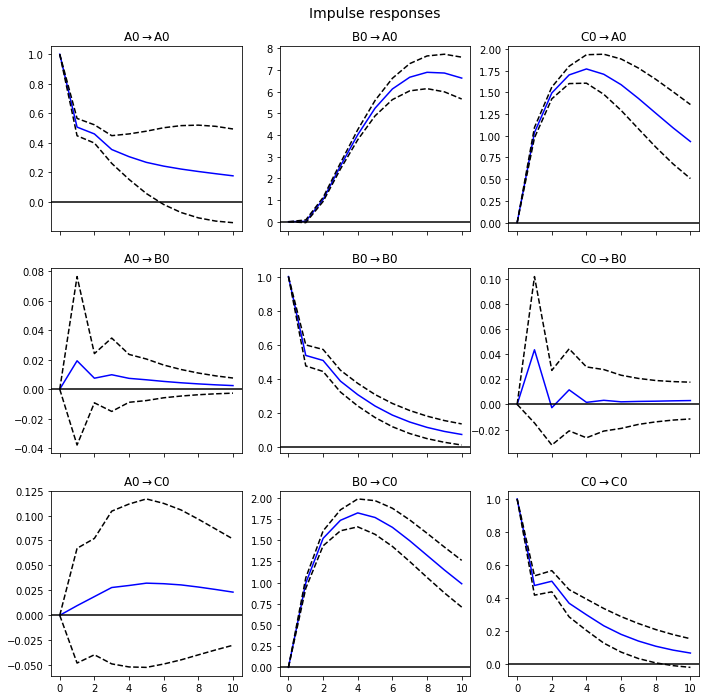

In [19]:
irf=results.irf(10)
irf.plot(orth=False)
pyplot.show()

## Variables Sorting (Decreasing Order of Exogeneity)

B-> C-> A

## VAR Forecasting

Lag Order: 2
[[-1.94104641e+01  5.03963569e-01 -1.36313418e+00]
 [-1.69942919e+01  5.03033660e-01 -4.43397126e-01]
 [-1.34996894e+01  3.19501467e-01  3.24082263e-01]
 [-1.00331316e+01  2.28675337e-01  7.20005734e-01]
 [-6.82304793e+00  1.34922583e-01  8.92680897e-01]
 [-4.15819446e+00  6.63481920e-02  9.19410233e-01]
 [-2.07581668e+00  1.21459016e-02  8.47997580e-01]
 [-5.65396328e-01 -2.85649275e-02  7.24565568e-01]
 [ 4.41898862e-01 -5.86457875e-02  5.75673601e-01]
 [ 1.03234165e+00 -8.05158007e-02  4.21448139e-01]]


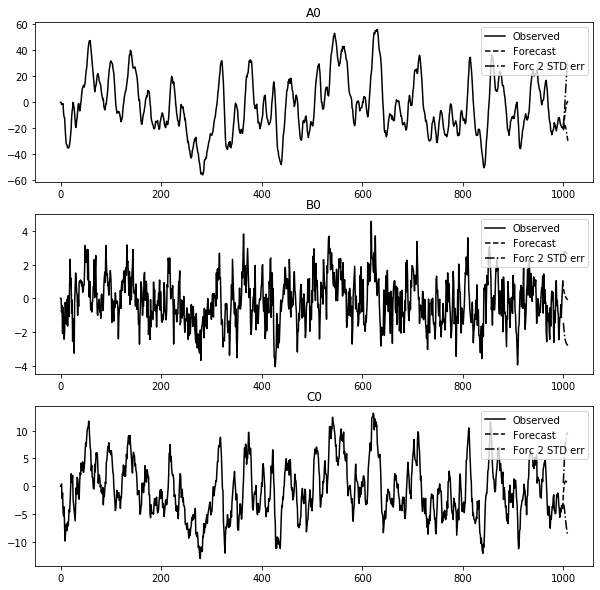

In [20]:
lag_order=results.k_ar
print("Lag Order:",lag_order)
forecast_values=results.forecast(dfr.values[-lag_order:],10)
print(forecast_values)
results.plot_forecast(10)
pyplot.show()

# Question 2

## Data Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000171B95FC7B8>],
      dtype=object)

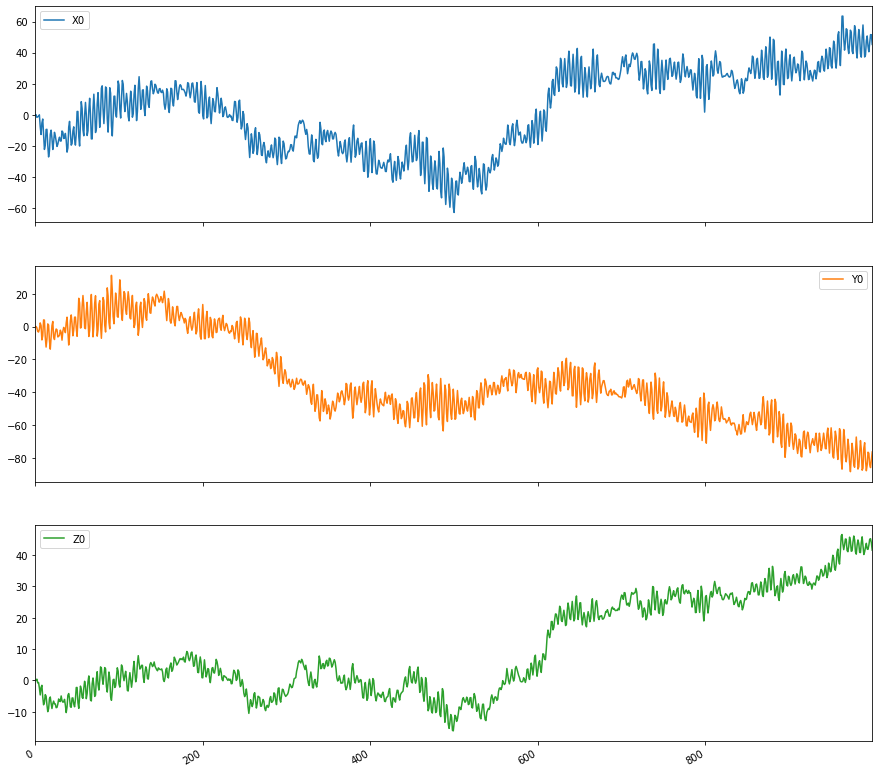

In [21]:
x0=x["0"]
y0=y["0"]
z0=z["0"]
dfr2=pd.DataFrame({"X0":x0,"Y0":y0,"Z0":z0})
dfr2.plot(subplots=True,layout=(3,1),figsize=(15,15))

## DataFrame the Sereis

In [22]:
dfr2.head(10)

,X0,Y0,Z0
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,-1.690123,-0.809757,0.420383
3,-1.298689,-2.972061,-0.759944
4,-0.980425,-3.376950,-0.643369
5,-0.053111,-1.642459,-2.372698
6,-7.650406,2.186262,-4.603154
7,-12.711189,0.584808,-2.184053
8,-5.299092,-8.167903,-1.534698
9,-2.755303,-5.639875,-5.262836


## VAR Model

In [23]:
model2=VAR(dfr2)
model2

## Lag Order Selection

In [24]:
lag_order2=model2.select_order(15)
print(lag_order2.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        15.65       15.66   6.259e+06       15.66
1        3.532       3.591       34.18       3.554
2     0.02254*     0.1268*      1.023*    0.06221*
3      0.03348      0.1825       1.034     0.09016
4      0.04409      0.2378       1.045      0.1178
5      0.05314      0.2916       1.055      0.1438
6      0.06478      0.3479       1.067      0.1725
7      0.07594      0.4038       1.079      0.2006
8      0.09108      0.4636       1.095      0.2328
9       0.1015      0.5187       1.107      0.2602
10      0.1017      0.5637       1.107      0.2774
11      0.1120      0.6186       1.119      0.3047
12      0.1233      0.6747       1.131      0.3330
13      0.1307      0.7268       1.140      0.3575
14      0.1401      0.7809       1.151      0.3838
15      0.1414      0.8268       1.152      0.4021
-------------------------------

## Model Fit at Different Lag Order

In [25]:
res1=model2.fit(1)
print(res1.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, Mar, 2020
Time:                     21:42:57
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    3.58973
Nobs:                     999.000    HQIC:                   3.55319
Log likelihood:          -6004.19    FPE:                    34.1510
AIC:                      3.53079    Det(Omega_mle):         33.7440
--------------------------------------------------------------------
Results for equation X0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -1.199071         0.269194           -4.454           0.000
L1.X0         0.283582         0.021976           12.904           0.000
L1.Y0         0.321918         0.012500           25.753           0.000
L1.Z0         1.433426

In [26]:
res2=model2.fit(2)
print(res2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, Mar, 2020
Time:                     21:42:57
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.143403
Nobs:                     998.000    HQIC:                 0.0794136
Log likelihood:          -4247.35    FPE:                    1.04099
AIC:                    0.0401762    Det(Omega_mle):         1.01939
--------------------------------------------------------------------
Results for equation X0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.068742         0.053248           -1.291           0.197
L1.X0         0.703151         0.008206           85.692           0.000
L1.Y0         0.224385         0.029645            7.569           0.000
L1.Z0         2.023227

In [27]:
res3=model2.fit(3)
print(res3.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, Mar, 2020
Time:                     21:42:57
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.197574
Nobs:                     997.000    HQIC:                  0.106089
Log likelihood:          -4238.96    FPE:                    1.05126
AIC:                    0.0499883    Det(Omega_mle):         1.02025
--------------------------------------------------------------------
Results for equation X0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.064666         0.053267           -1.214           0.225
L1.X0         0.698258         0.031793           21.963           0.000
L1.Y0         0.222466         0.032608            6.822           0.000
L1.Z0         2.026623

## Model Fit at Optimum Lag Order & Result

In [28]:
results2=model2.fit(2)
print(results2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, Mar, 2020
Time:                     21:42:57
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.143403
Nobs:                     998.000    HQIC:                 0.0794136
Log likelihood:          -4247.35    FPE:                    1.04099
AIC:                    0.0401762    Det(Omega_mle):         1.01939
--------------------------------------------------------------------
Results for equation X0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.068742         0.053248           -1.291           0.197
L1.X0         0.703151         0.008206           85.692           0.000
L1.Y0         0.224385         0.029645            7.569           0.000
L1.Z0         2.023227

## Finding Number of Roots

In [29]:
K=3 # Variables
p=2 # Lag Order
nroots2=K*p
print()
print("Roots : ")
for i in range(0,nroots2):
    print(VARResults.roots(results2)[i])
print()
print("Moduli : ")
for i in range(0,nroots2):
    print(np.absolute(VARResults.roots(results2)[i]))


Roots : 
(21.584291192040475-0j)
(2.2958277878268056-0j)
(0.2885975818918369+0.9886262824620379j)
(0.2885975818918369-0.9886262824620379j)
(1.0042965693899324-0j)
(0.9993052689463219-0j)

Moduli : 
21.584291192040475
2.2958277878268056
1.0298885816672232
1.0298885816672232
1.0042965693899324
0.9993052689463219


<b>From all the Moduli Values, one Value is not greater than 1, so the Model is NOT Stationary.</b>

## Johansen Cointegration Test & Rank

In [30]:
rank_test=select_coint_rank(dfr2,-1,2,method='trace',signif=0.05)
print(rank_test)
print('Rank Test:',rank_test.rank)

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          452.3          24.28
  1   3          5.069          12.32
-------------------------------------
Rank Test: 1


## VECM Model & Model Fit

In [31]:
mod=VECM(dfr2,seasons=4,k_ar_diff=lag_order2.aic,coint_rank=rank_test.rank,deterministic='nc')
vecm_res=mod.fit()
print(vecm_res.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation X0
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
season1       -0.1251      0.090     -1.385      0.166      -0.302       0.052
season2       -0.2922      0.090     -3.235      0.001      -0.469      -0.115
season3       -0.0718      0.091     -0.793      0.428      -0.249       0.106
L1.X0          0.5676      0.036     15.747      0.000       0.497       0.638
L1.Y0         -0.2109      0.031     -6.839      0.000      -0.271      -0.150
L1.Z0          0.2942      0.098      3.011      0.003       0.103       0.486
L2.X0          0.0314      0.034      0.932      0.351      -0.035       0.098
L2.Y0          0.0015      0.020      0.078      0.938      -0.037       0.040
L2.Z0         -0.1378      0.078     -1.757      0.079      -0.292       0.016
Det. terms outside the coint. relation & lagged e

## Alpha & Beta Matrix

In [32]:
print("Alpha:\n",vecm_res.alpha)
print("Beta:\n",vecm_res.beta)

Alpha:
 [[-0.86607556]
 [ 0.56218963]
 [-0.20616618]]
Beta:
 [[ 1.        ]
 [-0.49960427]
 [-2.00082037]]


## VECM Forecasting

forecast:
[[ 39.95615848 -75.92516265  42.37378636]
 [ 43.04078618 -81.97825309  43.96372808]
 [ 49.74068748 -85.38978666  44.062202  ]
 [ 50.60971689 -81.53851781  42.54876772]
 [ 44.65255868 -76.03178734  41.62557046]
 [ 40.47043272 -76.64635736  42.53265681]
 [ 43.98015126 -82.28758166  43.96915838]
 [ 49.94633627 -84.82668311  43.86182522]
 [ 49.78273708 -80.74133476  42.43700664]
 [ 43.92319379 -76.08918534  41.73446086]]
lower:
[[ 37.98161143 -77.86306809  40.41870609]
 [ 38.37451465 -86.48865464  40.58644769]
 [ 41.35723576 -91.63067685  39.92525465]
 [ 40.4353233  -88.27765672  38.15591905]
 [ 34.12831935 -83.5514038   36.99996903]
 [ 29.62494551 -84.77129181  37.38841476]
 [ 32.09794811 -91.38632951  38.13045461]
 [ 36.21965165 -94.72460462  37.59154752]
 [ 35.0528463  -90.97560338  35.98893962]
 [ 28.94540504 -86.8209008   35.09524934]]
upper:
[[ 41.93070553 -73.98725721  44.32886662]
 [ 47.7070577  -77.46785153  47.34100848]
 [ 58.1241392  -79.14889647  48.19914934]
 [ 60.78

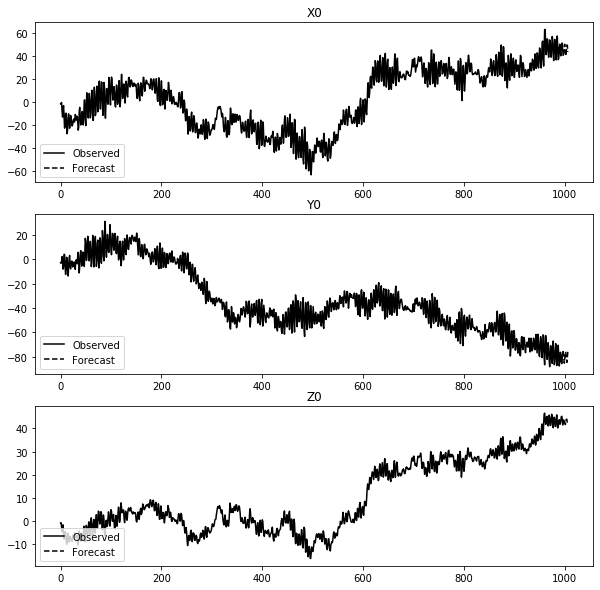

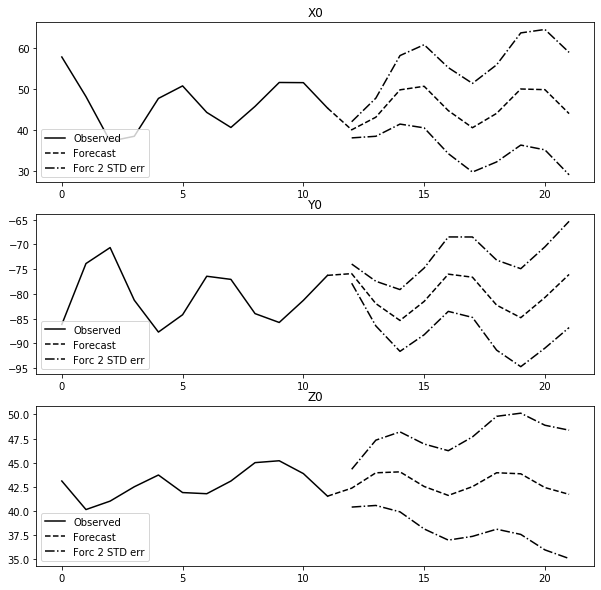

In [33]:
vecm_res.predict(steps=10,alpha=0.05)
for text,values in zip(("forecast","lower","upper"),vecm_res.predict(steps=10,alpha=0.05)):
    print(text+":",values,sep='\n')
vecm_res.plot_forecast(steps=10,plot_conf_int=False) 
vecm_res.plot_forecast(steps =10,n_last_obs = 12)
pyplot.show()